# Using pyodenn

In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sys.path.append('D:/Git/pydode/pyodenn')

In [2]:
# Import the pyodenn module
import pyodenn

Using TensorFlow backend.


## Creating a Solver
We create a solver with by creating an OdeSystem object. When creating the object, we define the equation that we want to solve. 

After creating a solver, we create input data with the create_input_data method. At first, leave these at default values.

In [3]:
solver = pyodenn.solvers.OdeSystem(equation = "x' = -5x")
solver.create_input_data(num_batch = 20, len_batch = 1)

## Solving the equation
The solve method of OdeSystem actually will train the neural network. Define "ic", the initial condition, number of training epochs, a learning rate, and the number of nodes for each layer. 

In [4]:
solver.solve(ic = 5, epochs = 500, learning_rate=.01, nodes = 50)

self.eq: -5x


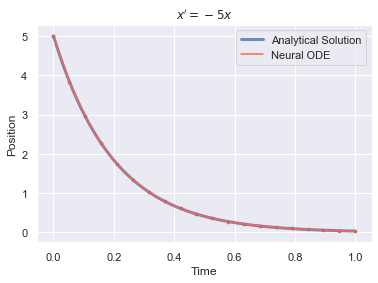

In [9]:
fig, ax = plt.subplots(figsize = (6,4))

# Calculate the analytical solution to the equation
xdat = np.arange(0,1,.001)
ydat = 5*np.exp(-5*xdat)
ax.plot(xdat, ydat, linewidth = 3, alpha = .8, label = 'Analytical Solution')

# Compute the Neural Network's solution. Note that the 
# predict method can take a matplotlib axes as an argument.
solver.predict(ax = ax)

## Solving a second order ODE
A second order ODE can also be solved. THe only main difference here is that we change the equation to be second order, and we must define a second inital condition for the first derivative of the equation ("ic2"). However, as of now, ic2 actually does not do anything; usually, this is near zero when trained. 

In [6]:
second_order_solver = pyodenn.solvers.OdeSystem(equation = "x'' = -15x")
second_order_solver.create_input_data(num_batch = 20, len_batch = 1)

In [7]:
second_order_solver.solve(ic = 5, ic2 = 0, epochs = 2000, learning_rate=.002, nodes = 50)

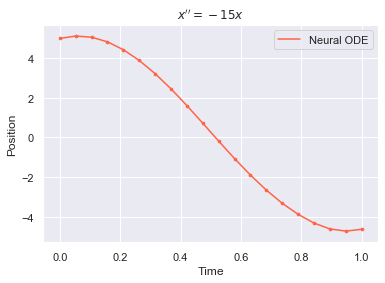

In [8]:
second_order_solver.predict(ax = None)